In [22]:
import pandas as pd
import seaborn as sns
import numpy as np 
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, stddev, count,sum, floor, avg, count, stddev, when
import matplotlib.pyplot as plt

In [15]:
# Initialize Spark session
spark = SparkSession.builder.appName("BostonHousingAnalysis").getOrCreate()

# Load a CSV file
BH = spark.read.option("header", "true").csv("C:\NU\QUARTER 3\ALY6110-Data Management & Big Data\Module 2\BostonHousing.csv")

# Show the first few rows of the data
BH.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|  18| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|  24|
|0.02731|   0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729|   0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237|   0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905|   0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985|   0| 2.18|   0|0.458| 6.43|58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012|66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172|96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631| 100|6.0821|  5|311|   15.2|386.63|29.9

In [16]:
##checking for null values
null_counts = BH.select([sum(col(c).isNull().cast("int")).alias(c) for c in BH.columns])
null_counts.show()

+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+
|crim| zn|indus|chas|nox| rm|age|dis|rad|tax|ptratio|  b|lstat|medv|
+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+
|   0|  0|    0|   0|  0|  0|  0|  0|  0|  0|      0|  0|    0|   0|
+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+



In [23]:
# Calculate frequency distribution for the 'RM' (average number of rooms) column
freq_dist = BH.groupBy("RM").count().orderBy("RM")

# Convert to Pandas DataFrame for plotting
freq_dist_pd = freq_dist.toPandas()

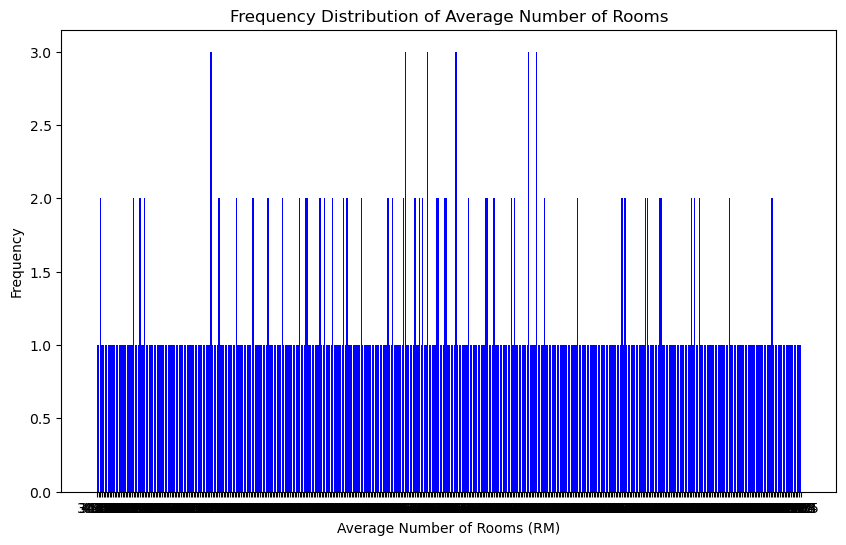

In [24]:
# Plot the frequency distribution
plt.figure(figsize=(10, 6))
plt.bar(freq_dist_pd["RM"], freq_dist_pd["count"], color='blue')
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Average Number of Rooms")
plt.show()

# Stop the Spark session
spark.stop()

In [17]:
# Create bins for the average number of rooms
BH = BH.withColumn("RM_bin", floor(col("RM")))
BH.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+------+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|RM_bin|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+------+
|0.00632|  18| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|  24|     6|
|0.02731|   0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|     6|
|0.02729|   0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|     7|
|0.03237|   0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|     6|
|0.06905|   0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|     7|
|0.02985|   0| 2.18|   0|0.458| 6.43|58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|     6|
|0.08829|12.5| 7.87|   0|0.524|6.012|66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|     6|
|0.14455|12.5| 7.87|   0|0.524|6.172|96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|     6|

In [18]:
# Define bins for RM
BH = BH.withColumn("RM_bin", 
    when((col("RM") <= 4), "<= 4")
    .when((col("RM") > 4) & (col("RM") <= 6), "4-6")
    .when((col("RM") > 6) & (col("RM") <= 8), "6-8")
    .otherwise("> 8")
)

# Show the data with the new RM_bin column
BH.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+------+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|RM_bin|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+------+
|0.00632|  18| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|  24|   4-6|
|0.02731|   0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|   4-6|
|0.02729|   0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|   6-8|
|0.03237|   0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|   4-6|
|0.06905|   0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|   6-8|
|0.02985|   0| 2.18|   0|0.458| 6.43|58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|   4-6|
|0.08829|12.5| 7.87|   0|0.524|6.012|66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|   4-6|
|0.14455|12.5| 7.87|   0|0.524|6.172|96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|   4-6|

In [19]:
# Calculate statistics for each bin
binned_stats = BH.groupBy("RM_bin").agg(
    avg(col("MEDV")).alias("avg_MEDV"),
    count(col("MEDV")).alias("count"),
    stddev(col("MEDV")).alias("stddev_MEDV")
)

binned_stats.show()

+------+------------------+-----+------------------+
|RM_bin|          avg_MEDV|count|       stddev_MEDV|
+------+------------------+-----+------------------+
|   6-8|         38.396875|   64| 8.722639194865826|
|  <= 4|             17.26|   15|10.677399362338058|
|   4-6|20.340281030444984|  427| 6.455042641818176|
+------+------------------+-----+------------------+



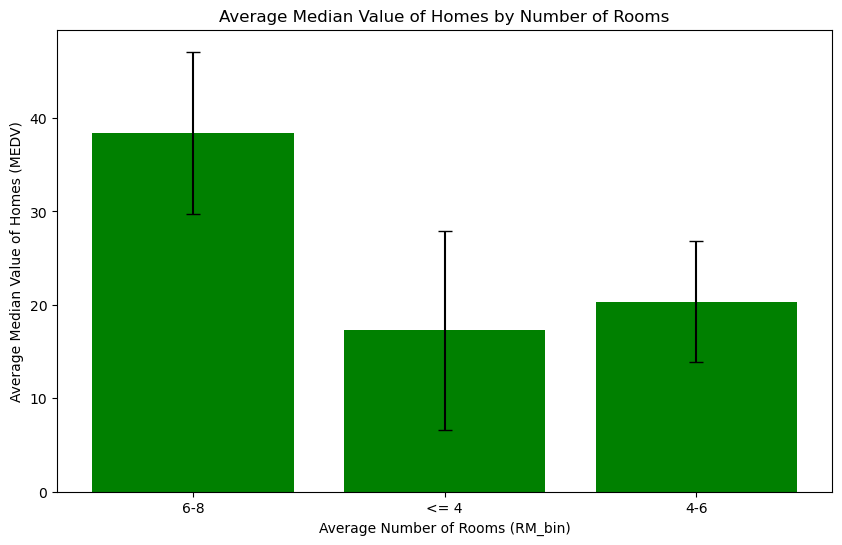

In [20]:
# Convert the Spark DataFrame to Pandas for visualization
binned_stats_pd = binned_stats.toPandas()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(binned_stats_pd["RM_bin"], binned_stats_pd["avg_MEDV"], yerr=binned_stats_pd["stddev_MEDV"], capsize=5, color='Green')
plt.xlabel("Average Number of Rooms (RM_bin)")
plt.ylabel("Average Median Value of Homes (MEDV)")
plt.title("Average Median Value of Homes by Number of Rooms")
plt.show()

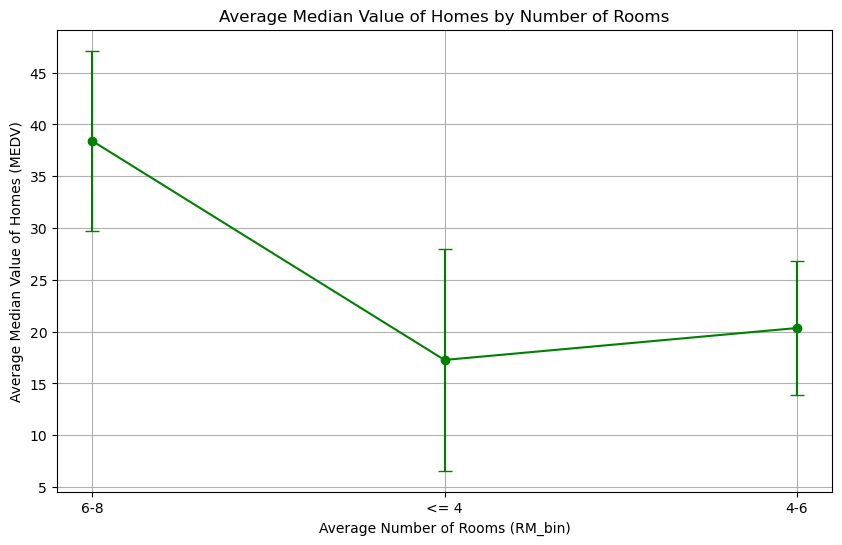

In [21]:
# Assuming binned_stats_pd is the Pandas DataFrame version of binned_stats
plt.figure(figsize=(10, 6))
plt.errorbar(binned_stats_pd["RM_bin"], binned_stats_pd["avg_MEDV"], yerr=binned_stats_pd["stddev_MEDV"], capsize=5, fmt='-o', color='Green')
plt.xlabel("Average Number of Rooms (RM_bin)")
plt.ylabel("Average Median Value of Homes (MEDV)")
plt.title("Average Median Value of Homes by Number of Rooms")
plt.grid(True)
plt.show()
